In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [117]:
# The path to our CSV file
data = pd.read_csv("Survey.csv")

# Read our mental health survey data into pandas
df = data

# Display all columns of the DataFrame 
pd.set_option('display.max_columns', None)  

df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [118]:
# Get a list of all of our columns for easy reference
df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [119]:
gender_column = df["What is your gender?"].unique()
gender_column_df = pd.DataFrame({'Unique Gender Values': gender_column})
print(gender_column_df) 

                       Unique Gender Values
0                                      Male
1                                      male
2                                     Male 
3                                    Female
4                                         M
..                                      ...
66  female-bodied; no feelings about gender
67                                  cis man
68                                     AFAB
69                        Transgender woman
70                                     MALE

[71 rows x 1 columns]


In [120]:
# Creat a new DataFrame to print 2 columns: Gender and Count
gender_column = df["What is your gender?"].unique()
gender_counts = df["What is your gender?"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]
print(gender_counts) 

         Gender  Count
0          Male    610
1          male    249
2        Female    153
3        female     95
4             M     86
..          ...    ...
65     cis male      1
66        Human      1
67  Genderfluid      1
68         Enby      1
69         MALE      1

[70 rows x 2 columns]


In [121]:
# Renaming values in 'Gender' column
gender_cleaning = {
    'M':'Male',
    'Female':'Female',
    'Male':'Male',
    'male':'Male',
    'female': 'Female',
    'm':'Male',
    'Male-ish':'Male', 
    'maile':'Male', 
    'Trans-female':'Female',
    'Cis Female':'Female', 
    'F':'Female',
    'something kinda male?':'Male', 
    'Cis Male':'Male', 
    'Woman': 'Female',
    'f': 'Female',
    'Mal':'Male',
    'Male (CIS)':'Male', 
    'queer/she/they':'Female',
    'non-binary':'Non-binary',
    'Femake':'Female',
    'woman':'Female',
    'Make':'Male', 
    'Nah':'n/a',
    'All':'Non-binary',
    'Enby':'n/a', 
    'fluid':'n/a',
    'Genderqueer':'Non-binary',
    'Female ':'Female', 
    'Androgyne':'Non-binary',
    'Agender':'Non-binary',
    'cis-female/femme':'Female', 
    'Guy (-ish) ^_^':'Male',
    'male leaning androgynous':'Male',
    'Male ':'Male',
    'Man':'Male',
    'Trans woman':'Female', 
    'msle':'Male',
    'Neuter':'n/a',
    'Female (trans)':'Female', 
    'queer':'Non-binary',
    'Female (cis)':'Female', 
    'Mail':'Male', 
    'cis male':'Male',
    'A little about you':'n/a',
    'Malr':'Male',
    'p': 'n/a',
    'femail':'Female',
    'Cis Man':'Male',
    'ostensibly male, unsure what that really means':'Male',
   
}
data['What is your gender?'] = data['What is your gender?'].map(gender_cleaning)

# Get unique values in the cleaned 'Gender' column
gender_column_unique = data['What is your gender?'].unique()

# Calculate the counts of each unique gender value in the cleaned 'Gender' column
gender_column_counts = (data['What is your gender?'].value_counts())

# Calculate the percentage distribution of age values in the cleaned 'Age' column
gender_column_percentage = data['What is your gender?'].value_counts(normalize=True) * 100

# Print unique values, counts, and percentages
print(gender_column_unique)
print(gender_column_counts)
print(gender_column_percentage)

['Male' 'Female' nan 'Non-binary' 'n/a']
Male          1040
Female         325
Non-binary       7
n/a              1
Name: What is your gender?, dtype: int64
Male          75.746540
Female        23.670794
Non-binary     0.509832
n/a            0.072833
Name: What is your gender?, dtype: float64


In [122]:
# Get the unique values in the 'family_history' column
family_history_unique = data['Do you have a family history of mental illness?'].unique()

# Calculate the counts for each unique answer in the 'family_history' column
family_history_counts = data['Do you have a family history of mental illness?'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'family_history' column
family_history_percentage = data['Do you have a family history of mental illness?'].value_counts(normalize=True) * 100

# Print unique values, counts, and percentages
print(family_history_unique)
print(family_history_counts)
print(family_history_percentage)

['No' 'Yes' "I don't know"]
Yes             670
No              488
I don't know    275
Name: Do you have a family history of mental illness?, dtype: int64
Yes             46.755059
No              34.054431
I don't know    19.190509
Name: Do you have a family history of mental illness?, dtype: float64


In [49]:
# Create a DataFrame to store the data
family_history_table = pd.DataFrame({
    'family_history': family_history_counts.index,
    'Count': family_history_counts.values,
    'Percentage': family_history_percentage.values
})

# Display the resulting table
print(family_history_table)

  family_history  Count  Percentage
0            Yes    670   46.755059
1             No    488   34.054431
2   I don't know    275   19.190509


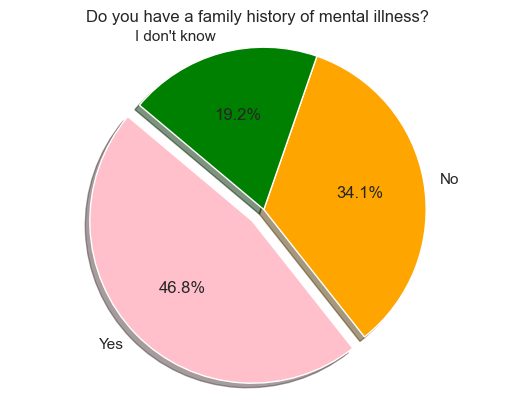

In [50]:
# Data from the printed DataFrame
labels = family_history_table['family_history']
sizes = family_history_table['Percentage']
colors = ['pink', 'orange', 'green']
explode = (0.1, 0, 0)  # Explode the "Yes" slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("Do you have a family history of mental illness?")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

In [51]:
# Get the unique answers in the 'treatment' column
treatment_unique = data['Have you ever sought treatment for a mental health issue from a mental health professional?'].unique()

# Calculate the counts for each unique answer in the 'treatment' column
treatment_counts = data['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'treatment' column
treatment_percentage = data['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts(normalize=True) * 100

# Print unique answers, counts, and percentages
print(treatment_unique)
print(treatment_counts)
print(treatment_percentage)

[0 1]
1    839
0    594
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
1    58.5485
0    41.4515
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: float64


In [52]:
# Create a DataFrame to store the data
treatment_table = pd.DataFrame({
    'treatment': treatment_counts.index,
    'Count': treatment_counts.values,
    'Percentage': treatment_percentage.values
})

# Display the resulting table
print(treatment_table)

   treatment  Count  Percentage
0          1    839     58.5485
1          0    594     41.4515


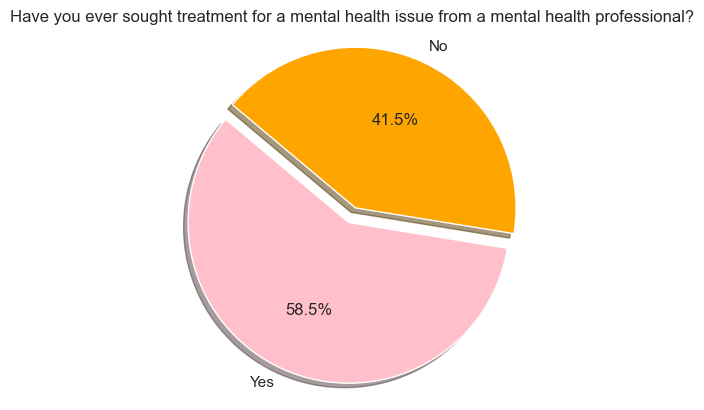

In [53]:
# Data from the printed DataFrame
labels = ['Yes', 'No']
sizes = [839, 594]
colors = ['pink', 'orange']
explode = (0.1, 0)  # Explode the "Yes" slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("Have you ever sought treatment for a mental health issue from a mental health professional?")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

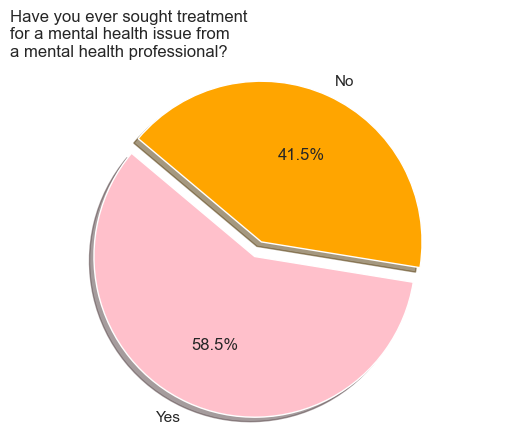

In [54]:
import matplotlib.pyplot as plt
import textwrap

# Data from the printed DataFrame
labels = ['Yes', 'No']
sizes = [839, 594]
colors = ['pink', 'orange']
explode = (0.1, 0)  # Explode the "Yes" slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Create a wrapped title
title_text = "Have you ever sought treatment for a mental health issue from a mental health professional?"
wrapped_title = textwrap.fill(title_text, width=30)  # Adjust the width as needed

# Add title to the pie chart
plt.title(wrapped_title, loc='left')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

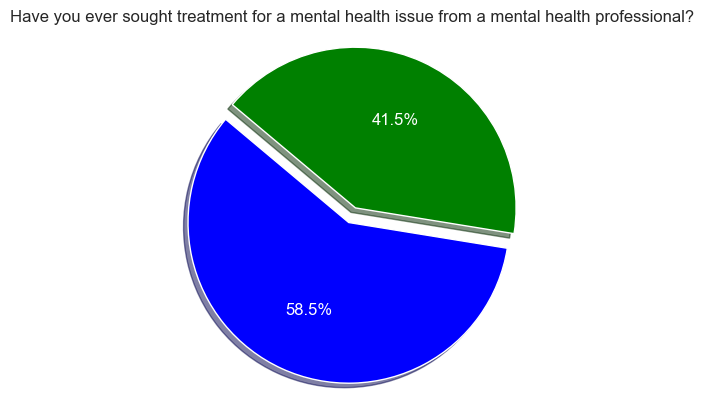

In [55]:
import matplotlib.pyplot as plt

# Data from the printed DataFrame
labels = ['Yes', 'No']
sizes = [839, 594]
colors = ['blue', 'green']
explode = (0.1, 0)  # Explode the "Yes" slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
        textprops={'color': "white"}, shadow=True, startangle=140)

# Add title to the pie chart
plt.title("Have you ever sought treatment for a mental health issue from a mental health professional?")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

In [56]:
selected_columns = ['Do you have a family history of mental illness?', 'Have you ever sought treatment for a mental health issue from a mental health professional?']
print(df[selected_columns])

     Do you have a family history of mental illness?  \
0                                                 No   
1                                                Yes   
2                                                 No   
3                                                 No   
4                                                Yes   
...                                              ...   
1428                                             Yes   
1429                                             Yes   
1430                                             Yes   
1431                                             Yes   
1432                                    I don't know   

      Have you ever sought treatment for a mental health issue from a mental health professional?  
0                                                     0                                            
1                                                     1                                            
2                          

In [65]:
crosstab_result = pd.crosstab(df['Do you have a family history of mental illness?'], ['Have you ever sought treatment for a mental health issue from a mental health professional?'])
print(crosstab_result)

col_0                                            Have you ever sought treatment for a mental health issue from a mental health professional?
Do you have a family history of mental illness?                                                                                             
No                                                                                               2                                          
Yes                                                                                              3                                          


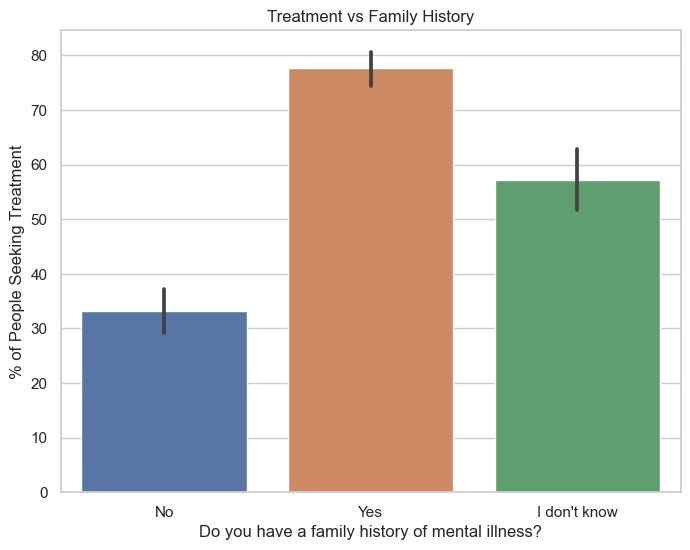

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x='Do you have a family history of mental illness?', y='Have you ever sought treatment for a mental health issue from a mental health professional?', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.ylabel('% of People Seeking Treatment')
plt.title('Treatment vs Family History')
plt.show()

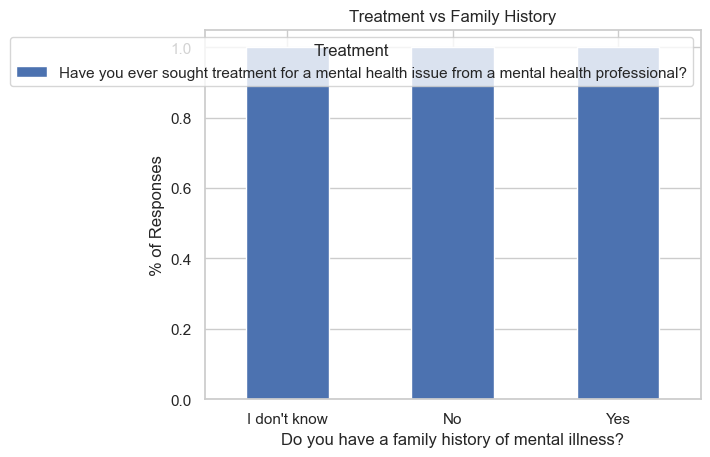

In [59]:
stacked_crosstab_result = crosstab_result.div(crosstab_result.sum(1), axis=0)
stacked_crosstab_result.plot(kind='bar', stacked=True)
plt.ylabel('% of Responses')
plt.title('Treatment vs Family History')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.show()

In [60]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstab_result)
if p < 0.05:
    print("There is a significant association between the two variables.")
else:
    print("There is no significant association between the two variables.")
    

There is no significant association between the two variables.


In [67]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstab_result)

# Print the calculated p-value
print("Calculated p-value:", p)

if p < 0.05:
    print("There is a significant association between the two variables.")
else:
    print("There is no significant association between the two variables.")

Calculated p-value: 1.0
There is no significant association between the two variables.


Have you ever sought treatment for a mental health issue from a mental health professional?    0  \
Do you have a family history of mental illness?                                                    
I don't know                                                                                 118   
No                                                                                           326   
Yes                                                                                          150   

Have you ever sought treatment for a mental health issue from a mental health professional?    1  
Do you have a family history of mental illness?                                                   
I don't know                                                                                 157  
No                                                                                           162  
Yes                                                                                          520  


<Figure size 800x600 with 0 Axes>

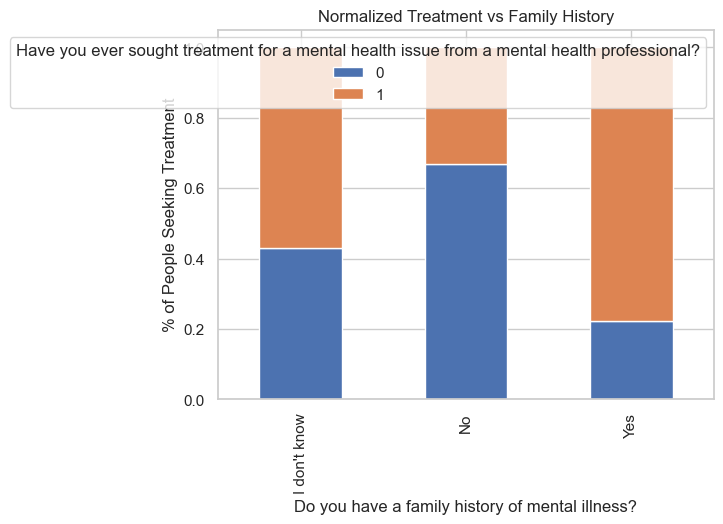

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported and prepared the DataFrame df

# Cross-tabulate the two columns
cross_tab = pd.crosstab(df['Do you have a family history of mental illness?'], df['Have you ever sought treatment for a mental health issue from a mental health professional?'])

print(cross_tab)

# Create a normalized bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
normalized_cross_tab = cross_tab.div(cross_tab.sum(1), axis=0)  # Normalize the counts to get percentages
normalized_cross_tab.plot(kind='bar', stacked=True)
plt.ylabel('% of People Seeking Treatment')
plt.title('Normalized Treatment vs Family History')
plt.show()

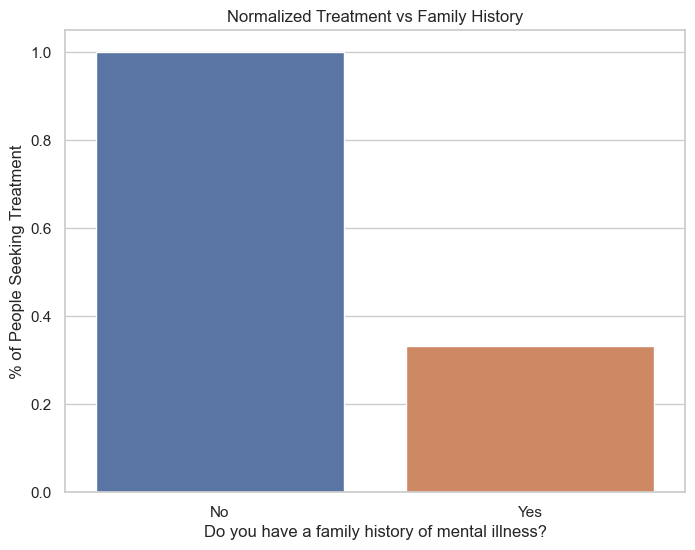

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Do you have a family history of mental illness?': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Have you ever sought treatment for a mental health issue from a mental health professional?': ['Yes', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Create the cross-tabulated data
crosstab_result = pd.crosstab(df['Do you have a family history of mental illness?'], df['Have you ever sought treatment for a mental health issue from a mental health professional?'], normalize='index')

# Reset the index for plotting
crosstab_result = crosstab_result.reset_index()

# Create the normalized bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Do you have a family history of mental illness?', y='Yes', data=crosstab_result)
plt.ylabel('% of People Seeking Treatment')
plt.title('Normalized Treatment vs Family History')
plt.show()

In [133]:
# Get the unique answers in the 'work_interfere' column
work_interfere_unique = data['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].unique()

# Calculate the counts for each unique answer in the 'work_interfere' column
work_interfere_counts = data['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'work_interfere' column
work_interfere_percentage = data['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].value_counts(normalize=True) * 100

# Print unique answers, counts, and percentages
print(work_interfere_unique)
print(work_interfere_counts)
print(work_interfere_percentage)

['Not applicable to me' 'Rarely' 'Sometimes' 'Never' 'Often']
Not applicable to me    557
Sometimes               369
Rarely                  322
Never                   120
Often                    65
Name: If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?, dtype: int64
Not applicable to me    38.869505
Sometimes               25.750174
Rarely                  22.470342
Never                    8.374040
Often                    4.535939
Name: If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?, dtype: float64


In [134]:
# Create a DataFrame to store the data
work_interfere_table = pd.DataFrame({
    'work_interfere': work_interfere_counts.index,
    'Count': work_interfere_counts.values,
    'Percentage': work_interfere_percentage.values
})

# Display the resulting table
print(work_interfere_table)

         work_interfere  Count  Percentage
0  Not applicable to me    557   38.869505
1             Sometimes    369   25.750174
2                Rarely    322   22.470342
3                 Never    120    8.374040
4                 Often     65    4.535939


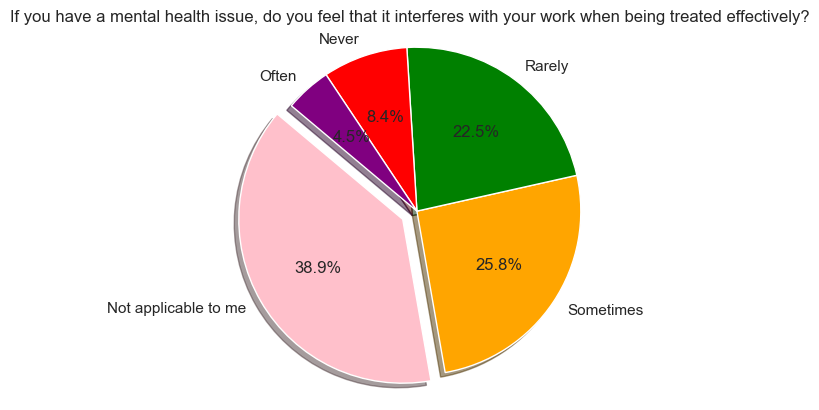

In [135]:
# Data from the printed DataFrame
labels = work_interfere_table['work_interfere']
sizes = work_interfere_table['Percentage']
colors = ['pink', 'orange', 'green', 'red', 'purple']
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

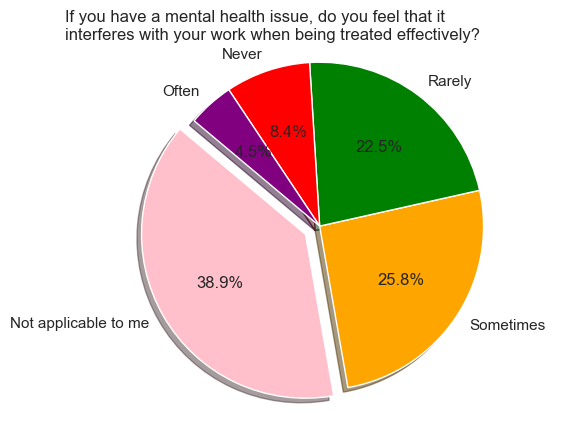

In [136]:
import matplotlib.pyplot as plt

# Data from the printed DataFrame
labels = work_interfere_table['work_interfere']
sizes = work_interfere_table['Percentage']
colors = ['pink', 'orange', 'green', 'red', 'purple']
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("If you have a mental health issue, do you feel that it\ninterferes with your work when being treated effectively?",
          loc='left', wrap=True)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

In [138]:
# Get the unique answers in the 'work_interfere' column
work_not_interfere_unique = data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].unique()

# Calculate the counts for each unique answer in the 'work_interfere' column
work_not_interfere_counts = data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'work_interfere' column
work_not_interfere_percentage = data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts(normalize=True) * 100

# Print unique answers, counts, and percentages
print(work_not_interfere_unique)
print(work_not_interfere_counts)
print(work_not_interfere_percentage)

['Not applicable to me' 'Sometimes' 'Often' 'Rarely' 'Never']
Often                   538
Not applicable to me    468
Sometimes               363
Rarely                   52
Never                    12
Name: If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?, dtype: int64
Often                   37.543615
Not applicable to me    32.658758
Sometimes               25.331472
Rarely                   3.628751
Never                    0.837404
Name: If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?, dtype: float64


In [139]:
# Create a DataFrame to store the data
work_not_interfere_table = pd.DataFrame({
    'work_not_interfere': work_not_interfere_counts.index,
    'Count': work_not_interfere_counts.values,
    'Percentage': work_not_interfere_percentage.values
})

# Display the resulting table
print(work_not_interfere_table)

     work_not_interfere  Count  Percentage
0                 Often    538   37.543615
1  Not applicable to me    468   32.658758
2             Sometimes    363   25.331472
3                Rarely     52    3.628751
4                 Never     12    0.837404


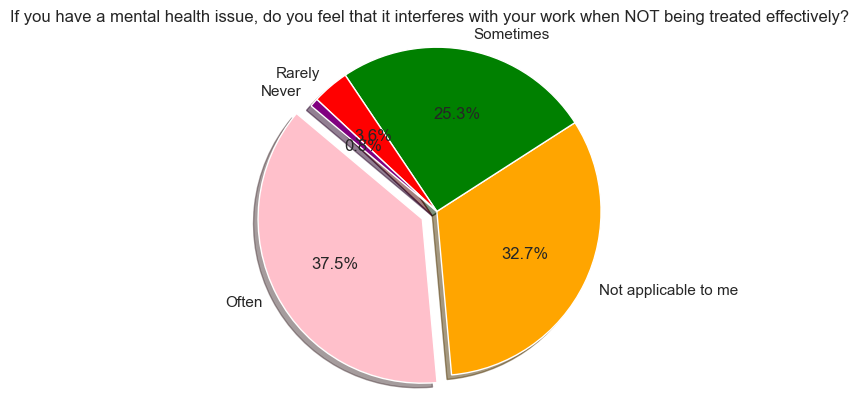

In [140]:
# Data from the printed DataFrame
labels = work_not_interfere_table['work_not_interfere']
sizes = work_not_interfere_table['Percentage']
colors = ['pink', 'orange', 'green', 'red', 'purple']
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

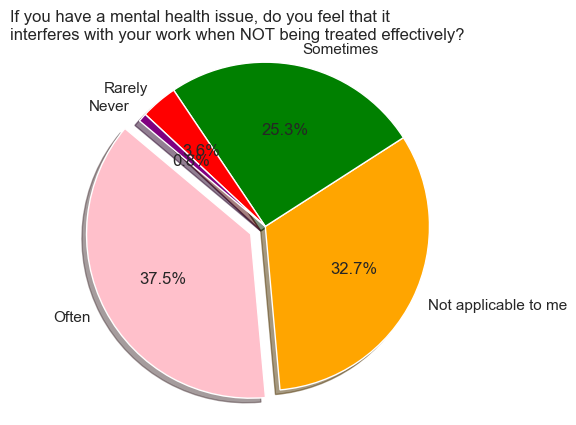

In [141]:
import matplotlib.pyplot as plt

# Data from the printed DataFrame
labels = work_not_interfere_table['work_not_interfere']
sizes = work_not_interfere_table['Percentage']
colors = ['pink', 'orange', 'green', 'red', 'purple']
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("If you have a mental health issue, do you feel that it\ninterferes with your work when NOT being treated effectively?",
          loc='left', wrap=True)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

In [142]:
# Get the unique answers in the 'no_employees' column
no_employees_unique = data['How many employees does your company or organization have?'].unique()

# Calculate the counts for each unique answer in the 'no_employees' column
no_employees_count = data['How many employees does your company or organization have?'].value_counts()

# Calculate the percentage distribution for each unique answer in the 'no_employees' column
no_employees_percentage = data['How many employees does your company or organization have?'].value_counts(normalize=True) * 100

# Print unique answers, counts, and percentages
print(no_employees_unique)
print(no_employees_count )
print(no_employees_percentage)

['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: How many employees does your company or organization have?, dtype: int64
26-100            25.479930
More than 1000    22.338569
100-500           21.640489
6-25              18.324607
500-1000           6.980803
1-5                5.235602
Name: How many employees does your company or organization have?, dtype: float64


In [143]:
# Create a DataFrame to store the data
no_employees_table = pd.DataFrame({
    'no_employees': no_employees_count.index,
    'Count': no_employees_count.values,
    'Percentage': no_employees_percentage.values
})

# Display the resulting table
print(no_employees_table)

     no_employees  Count  Percentage
0          26-100    292   25.479930
1  More than 1000    256   22.338569
2         100-500    248   21.640489
3            6-25    210   18.324607
4        500-1000     80    6.980803
5             1-5     60    5.235602


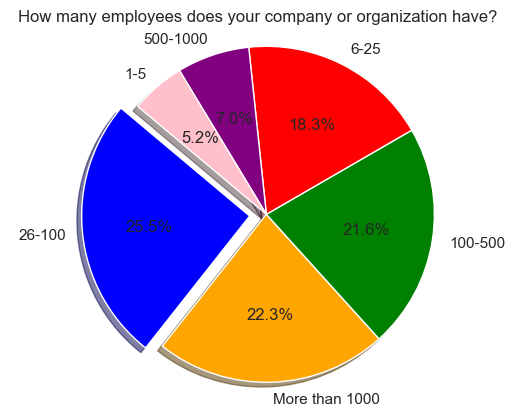

Text(0.5, 1.0, 'How many employees does your company or organization have?')

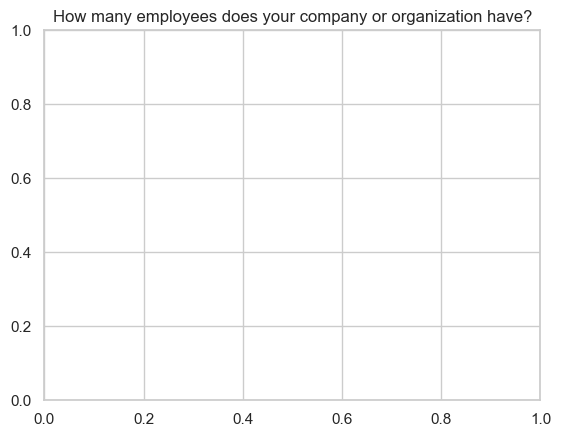

In [144]:
# Data from the printed DataFrame
labels = no_employees_table['no_employees']
sizes = no_employees_table['Percentage']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink']  # Add more colors if needed
explode = (0.1, 0, 0, 0, 0, 0)  # Explode the first slice a bit for emphasis

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title to the pie chart
plt.title("How many employees does your company or organization have?")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()
plt.title("How many employees does your company or organization have?")


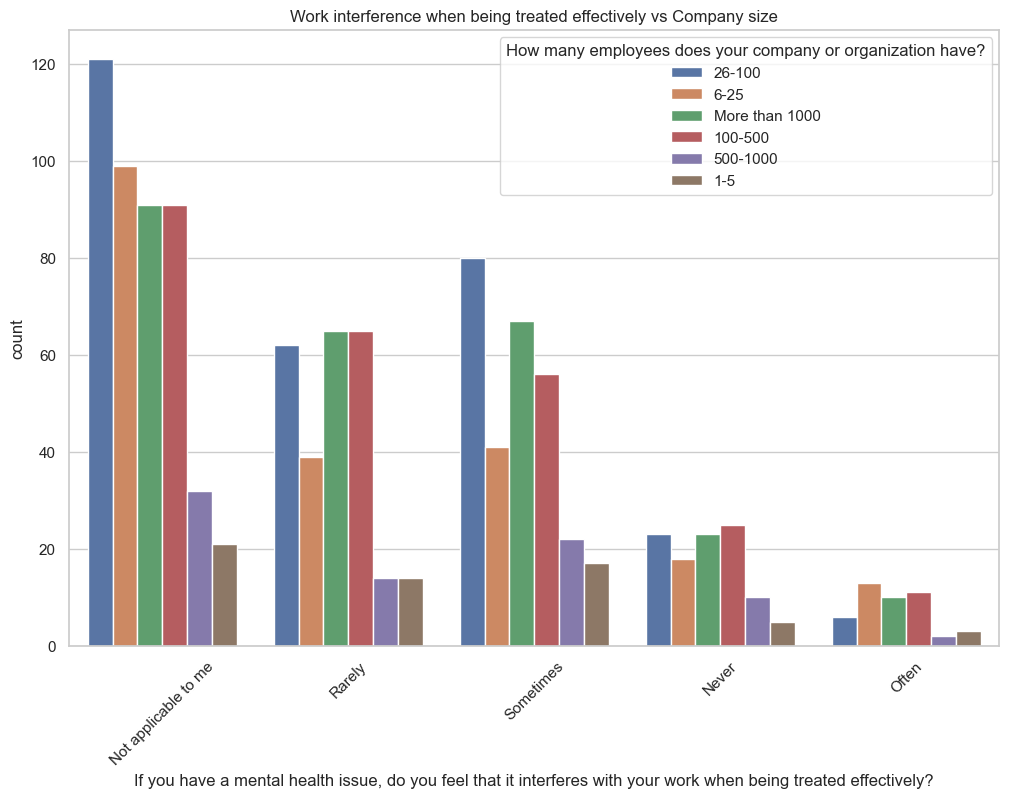

In [145]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?', hue='How many employees does your company or organization have?')
plt.xticks(rotation=45)
plt.title('Work interference when being treated effectively vs Company size')
plt.show()

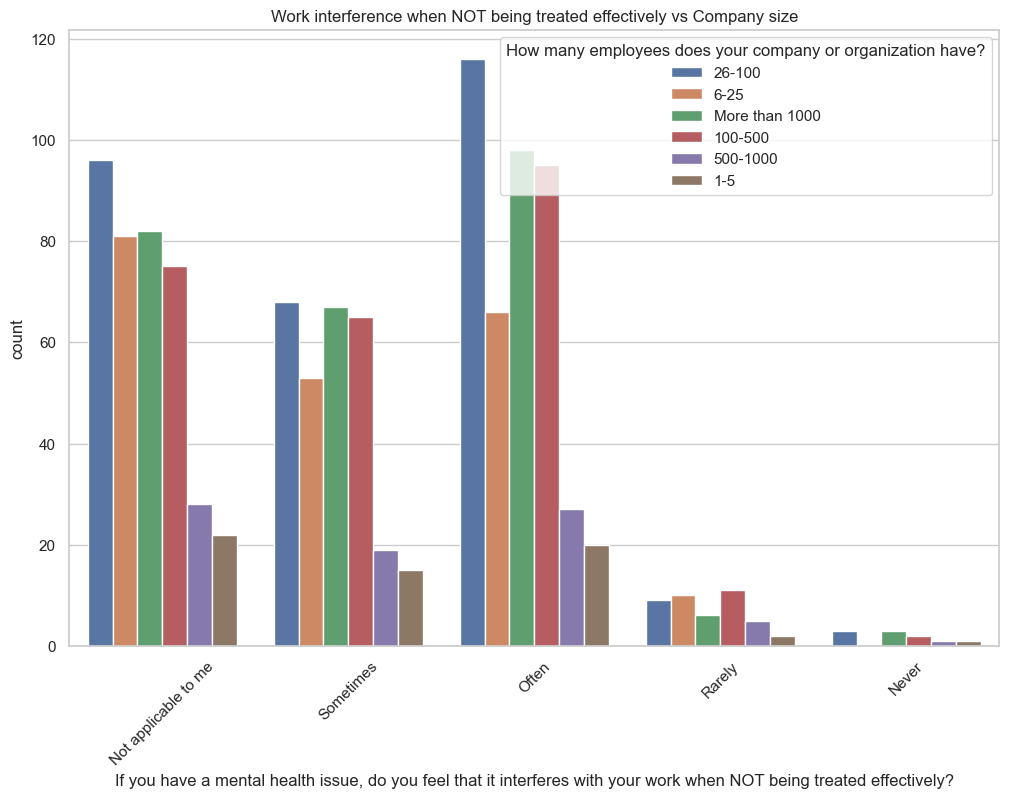

In [98]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', hue='How many employees does your company or organization have?')
plt.xticks(rotation=45)
plt.title('Work interference when NOT being treated effectively vs Company size')
plt.show()